## K Nearest Neighbor
##### KNN is a type of supervised machine learning algorithm , it is used for both regression and classification ,here we used for classification . this algorithm finds the nearest k points to the test data  and  which class is most probablity then we select that class for test data. this algorithm first find the distace between all train data and the test data . then select k points which has less distance to the target variable. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('MlAlgorithm/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [71]:
df.shape

(2000, 9)

In [6]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#### here there is no missing values so , we no need to handle

C:\Users\DELL\AppData\Local\Temp\ipykernel_18852\4101733340.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_18852\4101733340.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_18852

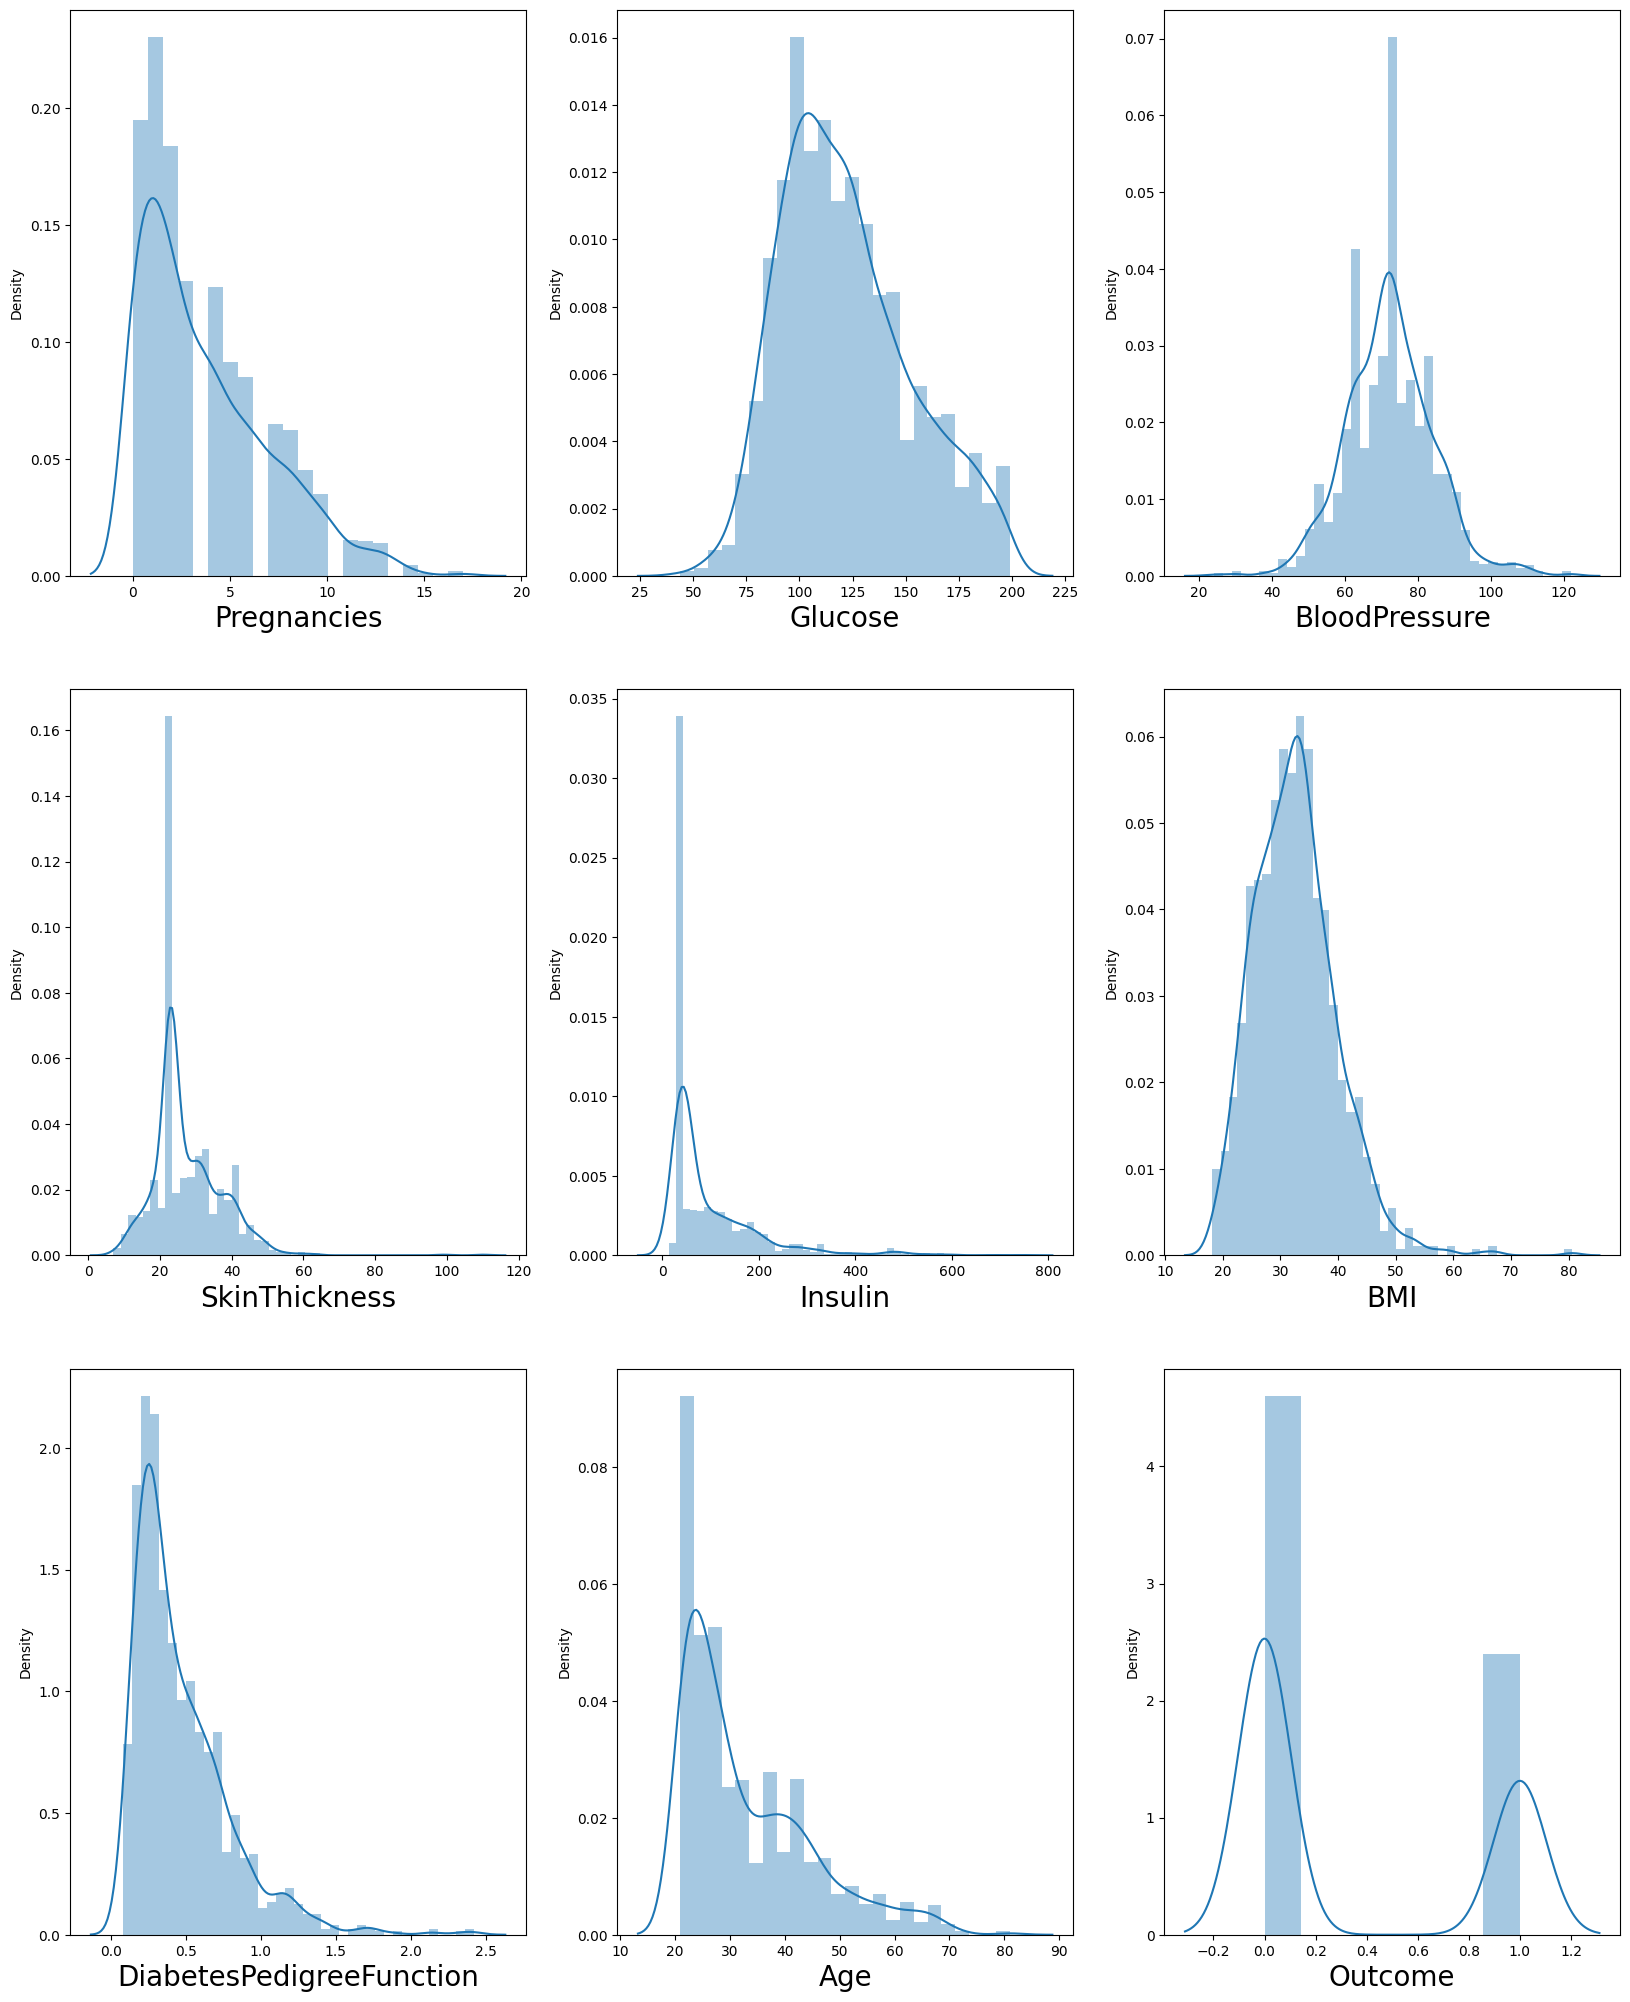

In [30]:
plotnumber=1
plt.figure(figsize=(20,25),facecolor='White')
for column in df:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
    

##### Here We can see that some skweness, BMI , Insulin , Skin Thickness, glocose , blood Pressure has some values are zore , we have to replace this value with median or remove the column

In [29]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())

### Creating Model

In [31]:
X=df.drop(columns=['Outcome'],axis=1)

In [32]:
y=df['Outcome']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,classification_report

In [42]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(X)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,random_state=42)

In [47]:
## taking optimal k to determine how many nearest neighbors  to create
error=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred!=y_test))

In [48]:
error

[0.036, 0.116, 0.16, 0.194, 0.194, 0.212, 0.2, 0.22, 0.196, 0.196]

Text(0.5, 1.0, 'K   vs    Error ')

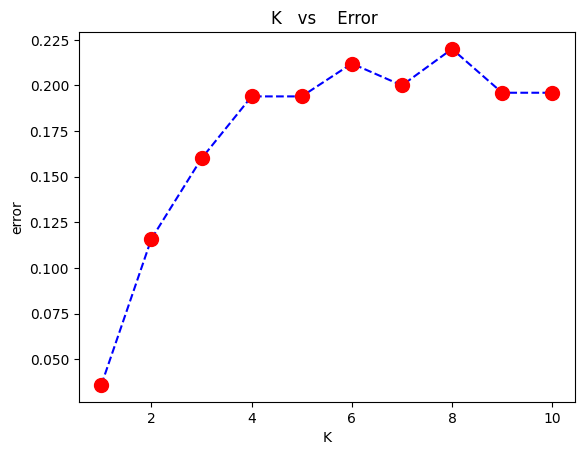

In [59]:
plt.plot(range(1,11),error,color='blue',marker='o',mfc='red',mec='red',markersize=10,linestyle='dashed')
plt.xlabel('K')
plt.ylabel('error')
plt.title('K   vs    Error ')

In [61]:
# we select k=5
k=5
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)


In [65]:
print('The Accuracy score= ',accuracy_score(y_test,pred))

The Accuracy score=  0.806


In [67]:
print('Classification report:',classification_report(y_test,pred))

Classification report:               precision    recall  f1-score   support

           0       0.83      0.87      0.85       320
           1       0.75      0.69      0.72       180

    accuracy                           0.81       500
   macro avg       0.79      0.78      0.79       500
weighted avg       0.80      0.81      0.80       500



In [ ]:
|